example 来自 [AutoTS Tutorial](https://winedarksea.github.io/AutoTS/build/html/source/tutorial.html#id3)

Here, we are forecasting the traffice along Interstate 94 between Minneapolis and St Paul in Minnesota.

In [1]:
from autots import AutoTS
from autots.datasets import load_hourly

df_wide = load_hourly(long=False)

In [2]:
df_wide.head()

,clouds_all,rain_1h,snow_1h,temp,traffic_volume,weather_main
datetime,,,,,,
2016-10-01 00:00:00,20.0,0.0,0.0,286.22,1195.0,Clouds
2016-10-01 01:00:00,20.0,0.0,0.0,285.60,776.0,Clouds
2016-10-01 02:00:00,56.0,0.0,0.0,285.49,666.0,Clouds
2016-10-01 03:00:00,56.0,0.0,0.0,284.59,448.0,Clouds
2016-10-01 04:00:00,56.0,0.0,0.0,284.26,512.0,Clouds


In [4]:
# here we care most about traffic volume, all other series assumed to be weight of 1
weights_hourly = {'traffic_volume': 20}

model_list = [
    'LastValueNaive',
    'GLS',
    'ETS',
    'AverageValueNaive',
]

model = AutoTS(
    forecast_length=49,
    frequency='infer',
    prediction_interval=0.95,
    ensemble=['simple', 'horizontal-min'],
    max_generations=5,
    num_validations=2,
    validation_method='seasonal 168',
    model_list=model_list,
    transformer_list='all',
    models_to_validate=0.2,
    drop_most_recent=1,
    n_jobs='auto',
)

model = model.fit(
    df_wide,
    weights=weights_hourly,
)

prediction = model.predict()

Using 3 cpus for n_jobs.
Data frequency is: H, used frequency is: H
Categorical features converted to numeric


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\shaping.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_enc = df_enc.fillna(method='ffill').fillna(method='bfill')


Model Number: 1 with model AverageValueNaive in generation 0 of 5
Model Number: 2 with model AverageValueNaive in generation 0 of 5
Model Number: 3 with model AverageValueNaive in generation 0 of 5
Model Number: 4 with model ETS in generation 0 of 5
Model Number: 5 with model ETS in generation 0 of 5
Model Number: 6 with model GLS in generation 0 of 5
Model Number: 7 with model GLS in generation 0 of 5
Model Number: 8 with model LastValueNaive in generation 0 of 5
Model Number: 9 with model LastValueNaive in generation 0 of 5
Model Number: 10 with model LastValueNaive in generation 0 of 5
Model Number: 11 with model LastValueNaive in generation 0 of 5
Model Number: 12 with model ETS in generation 0 of 5
Model Number: 13 with model LastValueNaive in generation 0 of 5
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 13 in generation 0: LastValueNaive
Model Number: 14 with model GLS in generation 0 of 5
Template Eval Error: Exception('Transformer FastICA failed

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.11487e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c

Model Number: 19 with model ETS in generation 0 of 5
Model Number: 20 with model ETS in generation 0 of 5
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 20 in generation 0: ETS
Model Number: 21 with model AverageValueNaive in generation 0 of 5
Model Number: 22 with model AverageValueNaive in generation 0 of 5
Model Number: 23 with model ETS in generation 0 of 5
Model Number: 24 with model ETS in generation 0 of 5
Model Number: 25 with model LastValueNaive in generation 0 of 5
Template Eval Error: MemoryError((17470, 17470, 52), dtype('float64')) in model 25 in generation 0: LastValueNaive
Model Number: 26 with model ETS in generation 0 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 26 in generation 0: ETS
Model Number: 27 with model ETS in generation 0 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'AlignLas

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).bfill()


Model Number: 42 with model AverageValueNaive in generation 1 of 5
Model Number: 43 with model LastValueNaive in generation 1 of 5
Model Number: 44 with model LastValueNaive in generation 1 of 5
Model Number: 45 with model ETS in generation 1 of 5
Model Number: 46 with model LastValueNaive in generation 1 of 5
Model Number: 47 with model AverageValueNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 47 in generation 1: AverageValueNaive
Model Number: 48 with model ETS in generation 1 of 5
Model Number: 49 with model ETS in generation 1 of 5
Model Number: 50 with model LastValueNaive in generation 1 of 5
Model Number: 51 with model LastValueNaive in generation 1 of 5
Model Number: 52 with model ETS in generation 1 of 5
New Generation: 2 of 5
Model Number: 53 with model LastValueNaive in generation 2 of 5
Model Number: 54 with model AverageValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer DatepartRe

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


Model Number: 69 with model AverageValueNaive in generation 2 of 5
Model Number: 70 with model LastValueNaive in generation 2 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'AnomalyRemoval', '2': 'bkfilter', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'rows': 1, 'lag': 28, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}, '1': {'method': 'zscore', 'method_params': {'distribution': 'chi2', 'alpha': 0.05}, 'fillna': 'mean', 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 70 in generation 2: LastValueNaive
Model Number: 71 with model LastValueNaive in generation 2 of 5
Model Number: 72 with model LastValueNaive in generation 2 of 5
New Generation: 3 of 5
Model Number: 73 with model AverageValueNaive in generation 3 of 5
Model 

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:243: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method=method, order=5).bfill()


Model Number: 82 with model AverageValueNaive in generation 3 of 5
Model Number: 83 with model AverageValueNaive in generation 3 of 5
Model Number: 84 with model AverageValueNaive in generation 3 of 5
Model Number: 85 with model LastValueNaive in generation 3 of 5


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.11487e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 86 with model ETS in generation 3 of 5
Model Number: 87 with model LastValueNaive in generation 3 of 5
Model Number: 88 with model LastValueNaive in generation 3 of 5
Model Number: 89 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer FastICA failed on fit') in model 89 in generation 3: AverageValueNaive
Model Number: 90 with model AverageValueNaive in generation 3 of 5
Model Number: 91 with model AverageValueNaive in generation 3 of 5
Model Number: 92 with model AverageValueNaive in generation 3 of 5
New Generation: 4 of 5
Model Number: 93 with model GLS in generation 4 of 5
Model Number: 94 with model AverageValueNaive in generation 4 of 5
Model Number: 95 with model LastValueNaive in generation 4 of 5
Model Number: 96 with model LastValueNaive in generation 4 of 5
Model Number: 97 with model AverageValueNaive in generation 4 of 5
Model Number: 98 with model ETS in generation 4 of 5
Model Number: 99 with model GLS in generation

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'zero', 'transformations': {'0': 'AlignLastValue', '1': 'Log', '2': 'CumSumTransformer', '3': 'Slice', '4': 'Slice'}, 'transformation_params': {'0': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {}, '3': {'method': 0.9}, '4': {'method': 0.5}}}. fail_on_forecast_nan=True") in model 115 in generation 5: ETS
Model Number: 116 with model LastValueNaive in generation 5 of 5


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:2722: RuntimeWarning: invalid value encountered in subtract
  np.interp(X_col_finite, quantiles, self.references_)


Model Number: 117 with model LastValueNaive in generation 5 of 5
Model Number: 118 with model GLS in generation 5 of 5
Model Number: 119 with model LastValueNaive in generation 5 of 5
Model Number: 120 with model AverageValueNaive in generation 5 of 5


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


Template Eval Error: ValueError('Model AverageValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 120 in generation 5: AverageValueNaive
Model Number: 121 with model ETS in generation 5 of 5
Model Number: 122 with model LastValueNaive in generation 5 of 5
Model Number: 123 with model AverageValueNaive in generation 5 of 5
Model Number: 124 with model GLS in generation 5 of 5
Model Number: 125 with model AverageValueNaive in generation 5 of 5
Model Number: 126 with model AverageValueNaive in generation 5 of 5
Model Number: 127 with model LastValueNaive in generation 5 of 5
Model Number: 128 with model AverageValueNaive in generation 5 of 5


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1017: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1019: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  models_pos.extend(per_series_des.idxmin().tolist())
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1017: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemb

Model Number: 129 with model Ensemble in generation 6 of Ensembles
Model Number: 130 with model Ensemble in generation 6 of Ensembles
Model Number: 131 with model Ensemble in generation 6 of Ensembles
Model Number: 132 with model Ensemble in generation 6 of Ensembles
Model Number: 133 with model Ensemble in generation 6 of Ensembles
Model Number: 134 with model Ensemble in generation 6 of Ensembles
Model Number: 135 with model Ensemble in generation 6 of Ensembles
Model Number: 136 with model Ensemble in generation 6 of Ensembles
Model Number: 137 with model Ensemble in generation 6 of Ensembles
Validation Round: 1
Model Number: 1 of 32 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 77.48: 
Model Number: 2 of 32 with model Ensemble for Validation 1
2 - Ensemble with avg smape 77.48: 
Model Number: 3 of 32 with model AverageValueNaive for Validation 1
3 - AverageValueNaive with avg smape 77.49: 
Model Number: 4 of 32 with model AverageValueNaive for Validation 1
4 - 

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


Traceback (most recent call last):
  File "c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\evaluator\auto_model.py", line 1285, in model_forecast
    df_forecast = model_forecast(
  File "c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\evaluator\auto_model.py", line 1390, in model_forecast
    return model.predict(
  File "c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\evaluator\auto_model.py", line 920, in predict
    raise ValueError(
ValueError: Model returned NaN due to a preprocessing transformer {'fillna': 'KNNImputer', 'transformations': {'0': 'PowerTransformer', '1': 'QuantileTransformer', '2': 'AlignLastValue', '3': 'SeasonalDifference'}, 'transformation_params': {'0': {}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'lag_1': 168, 'method': 'LastValue'}}}. fail_on_forecast_nan=True

FAILED: Ensemble BestN co

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\sklearn\preprocessing\_data.py:3286: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'KNNImputer', 'transformations': {'0': 'PowerTransformer', '1': 'QuantileTransformer', '2': 'AlignLastValue', '3': 'SeasonalDifference'}, 'transformation_params': {'0': {}, '1': {'output_distribution': 'uniform', 'n_quantiles': 1000}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '3': {'lag_1': 168, 'method': 'LastValue'}}}. fail_on_forecast_nan=True") in model 16 in generation 0: LastValueNaive
Model Number: 17 of 32 with model LastValueNaive for Validation 1
17 - LastValueNaive with avg smape 91.04: 
Model Number: 18 of 32 with model LastValueNaive for Validation 1
18 - LastValueNaive with avg smape 63.8: 
Model Number: 19 of 32 with model LastValueNaive for Validation 1
19 - LastValueNaive with avg smape 91.04: 
Model Number: 20 of 32 with model LastValueNaive for Validation 1
20 - LastValueNaive with avg smape 91.04: 
Model Number: 21 of 

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


25 - AverageValueNaive with avg smape 63.88: 
Model Number: 26 of 32 with model AverageValueNaive for Validation 1
26 - AverageValueNaive with avg smape 63.8: 
Model Number: 27 of 32 with model AverageValueNaive for Validation 1
27 - AverageValueNaive with avg smape 91.04: 
Model Number: 28 of 32 with model AverageValueNaive for Validation 1
28 - AverageValueNaive with avg smape 63.8: 
Model Number: 29 of 32 with model AverageValueNaive for Validation 1
29 - AverageValueNaive with avg smape 49.89: 
Model Number: 30 of 32 with model LastValueNaive for Validation 1
30 - LastValueNaive with avg smape 81.08: 
Model Number: 31 of 32 with model LastValueNaive for Validation 1
31 - LastValueNaive with avg smape 87.43: 
Model Number: 32 of 32 with model AverageValueNaive for Validation 1
32 - AverageValueNaive with avg smape 85.48: 
Validation Round: 2
Model Number: 1 of 32 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 76.88: 
Model Number: 2 of 32 with model Ensemble for 

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\tools\impute.py:54: RuntimeWarning: Mean of empty slice
  arr = np.nan_to_num(arr) + np.isnan(arr) * np.nan_to_num(np.nanmean(arr, axis=0))


25 - AverageValueNaive with avg smape 89.36: 
Model Number: 26 of 32 with model AverageValueNaive for Validation 2
26 - AverageValueNaive with avg smape 88.67: 
Model Number: 27 of 32 with model AverageValueNaive for Validation 2
27 - AverageValueNaive with avg smape 88.66: 
Model Number: 28 of 32 with model AverageValueNaive for Validation 2
28 - AverageValueNaive with avg smape 88.66: 
Model Number: 29 of 32 with model AverageValueNaive for Validation 2
29 - AverageValueNaive with avg smape 71.93: 
Model Number: 30 of 32 with model LastValueNaive for Validation 2
30 - LastValueNaive with avg smape 102.5: 
Model Number: 31 of 32 with model LastValueNaive for Validation 2
31 - LastValueNaive with avg smape 85.15: 
Model Number: 32 of 32 with model AverageValueNaive for Validation 2
32 - AverageValueNaive with avg smape 91.69: 
Model Number: 202 with model Ensemble in generation 7 of Ensembles


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1017: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1019: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  models_pos.extend(per_series_des.idxmin().tolist())
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1017: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemb

Model Number: 203 with model Ensemble in generation 7 of Ensembles
Model Number: 204 with model Ensemble in generation 7 of Ensembles
Model Number: 205 with model Ensemble in generation 7 of Ensembles
Model Number: 206 with model Ensemble in generation 7 of Ensembles
Model Number: 207 with model Ensemble in generation 7 of Ensembles
Model Number: 208 with model Ensemble in generation 7 of Ensembles
Model Number: 209 with model Ensemble in generation 7 of Ensembles
Model Number: 210 with model Ensemble in generation 7 of Ensembles
Model Number: 211 with model Ensemble in generation 7 of Ensembles
Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 74.02: 
Model Number: 2 of 10 with model Ensemble for Validation 1
2 - Ensemble with avg smape 77.49: 
Model Number: 3 of 10 with model Ensemble for Validation 1
3 - Ensemble with avg smape 95.82: 
Model Number: 4 of 10 with model Ensemble for Validation 1
📈 4 - Ensemble with avg smape 7

c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1271: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1273: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  models_pos.extend(per_series_des.idxmin().tolist())
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemble.py:1271: FutureWarning: The behavior of DataFrame.idxmin with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  cr_df = pd.DataFrame(per_series_des.idxmin()).transpose()
c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\models\ensemb

Model Number: 1 with model Ensemble in generation 0 of Horizontal Ensembles


c:\Users\lijinlong9\.conda\envs\ml-notes\lib\site-packages\autots\evaluator\auto_ts.py:1738: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hens_model_results.loc['Score'] = generate_score(


In [5]:
prediction.forecast.head()

,clouds_all,rain_1h,snow_1h,temp,traffic_volume,weather_main
2018-09-30 23:00:00,90.000000,0.006113,0.0,282.090000,903.550460,Clouds
2018-10-01 00:00:00,88.252268,0.154386,0.0,282.079306,467.501287,Clear
2018-10-01 01:00:00,87.030207,0.154386,0.0,282.068609,285.649740,Clear
2018-10-01 02:00:00,86.417098,0.154386,0.0,282.057910,172.838030,Clear
2018-10-01 03:00:00,86.454726,0.154386,0.0,282.047208,320.001987,Clear


<Axes: title={'center': 'traffic_volume with model Ensemble'}>

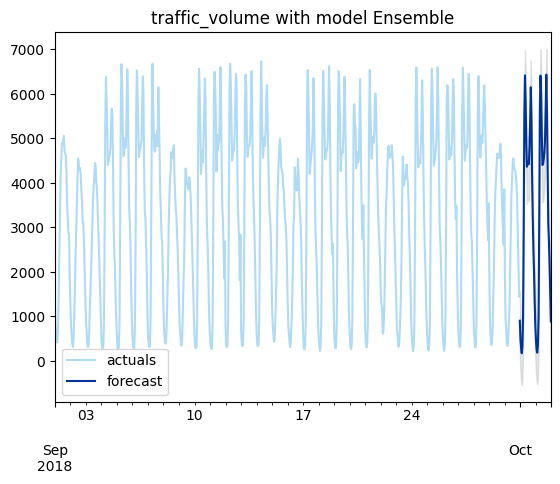

In [8]:
# plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[4],
                start_date="2018-09-01")

# Deployment and Template Import/Export

在模型训练之后，可以将top models导出为csv或json文件，下一次运行的时候只运行这些模型。

注意：依然需要重新训练

In [12]:
# after fitting an AutoTS model
example_filename = "data/example_export.csv"  # .csv/.json
model.export_template(example_filename, models='best',
                      n=15, max_per_model_class=3)

# on new training
model = AutoTS(forecast_length=49,
               frequency='infer', max_generations=0,
               num_validations=0, verbose=0)
model = model.import_template(example_filename, method='only') # method='add on'
print("Overwrite template is: {}".format(str(model.initial_template)))

Overwrite template is:                                   ID              Model  \
4   a0cc9691dbc6531dfd72f66d20be9acd  AverageValueNaive   
5   a35606600fd7308c67be38c9098bfc46  AverageValueNaive   
6   e44902bdd1996fb01a95d76cb45f9e80                ETS   
7   58b221d8bc72e49b7f9014f088b4a8a2                GLS   
8   f3403b32872447f4bf675d4a4c3912f7                ETS   
9   2125ec8b60cb74fe5d3d61a650a5c9f8  AverageValueNaive   
10  8b36468e1ed6ffbece001ce6fd953892                GLS   
11  c72b8e34174054595c9c0aeb599f18c5     LastValueNaive   
12  ca6698379a4bdd5a74d1e13230c7a268     LastValueNaive   
13  d2908cffee54af4b546bfd118121cd0d     LastValueNaive   
14  ebe571dae1dd74d0dbfc1811e5756fb2  AverageValueNaive   

                                      ModelParameters  \
4         {"method": "Weighted_Mean", "window": null}   
5         {"method": "Weighted_Mean", "window": null}   
6   {"damped_trend": false, "trend": null, "season...   
7                                       

In [15]:
model.initial_template.shape

(11, 5)

In [14]:
model.initial_template.head(10)

,ID,Model,ModelParameters,TransformationParameters,Ensemble
4,a0cc9691dbc6531dfd72f66d20be9acd,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
5,a35606600fd7308c67be38c9098bfc46,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
6,e44902bdd1996fb01a95d76cb45f9e80,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
7,58b221d8bc72e49b7f9014f088b4a8a2,GLS,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
8,f3403b32872447f4bf675d4a4c3912f7,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0
9,2125ec8b60cb74fe5d3d61a650a5c9f8,AverageValueNaive,"{""method"": ""Median"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
10,8b36468e1ed6ffbece001ce6fd953892,GLS,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0
11,c72b8e34174054595c9c0aeb599f18c5,LastValueNaive,{},"{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0
12,ca6698379a4bdd5a74d1e13230c7a268,LastValueNaive,{},"{""fillna"": ""zero"", ""transformations"": {""0"": ""C...",0
13,d2908cffee54af4b546bfd118121cd0d,LastValueNaive,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0


In [17]:
model = model.fit(
    df_wide,
    weights=weights_hourly,
)

prediction = model.predict()

In [18]:
prediction.forecast.head()

,clouds_all,rain_1h,snow_1h,temp,traffic_volume,weather_main
2018-10-01 00:00:00,-12.817616,-0.035649,0.0,289.737652,473.005776,Clear
2018-10-01 01:00:00,-14.152452,-0.035642,0.0,289.135723,280.006339,Clear
2018-10-01 02:00:00,-14.049578,-0.035638,0.0,288.445823,175.257710,Clear
2018-10-01 03:00:00,-14.064529,-0.035637,0.0,288.135485,347.668649,Clear
2018-10-01 04:00:00,-14.165022,-0.035639,0.0,287.572746,1037.660020,Clouds


In [20]:
model.results().head()

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,uwmse_weighted,smoothness_weighted,wasserstein_weighted,dwd_weighted,TotalRuntimeSeconds,Score
0,a0cc9691dbc6531dfd72f66d20be9acd,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:10.425148,0 days 00:00:00.002988,0 days 00:00:00.001995,0 days 00:00:10.447088,0,NaN,...,0.879184,11.962264,118.057992,707.994295,1476.413321,4.484488,9.208870,5.491929,10.4471,14.469255
1,a35606600fd7308c67be38c9098bfc46,AverageValueNaive,"{""method"": ""Weighted_Mean"", ""window"": null}","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:11.703939,0 days 00:00:00.001989,0 days 00:00:00.001995,0 days 00:00:11.716899,0,NaN,...,0.879184,11.962049,118.058685,707.986609,1476.350749,4.484486,9.207940,5.491976,11.7169,14.547539
2,e44902bdd1996fb01a95d76cb45f9e80,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:03.944758,0 days 00:00:00,0 days 00:00:03.536794,0 days 00:00:07.493483,0,NaN,...,0.871837,11.562396,129.660000,757.353088,1344.009620,4.688538,13.628205,5.065768,7.4935,16.420643
3,58b221d8bc72e49b7f9014f088b4a8a2,GLS,{},"{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0 days 00:00:01.902986,0 days 00:00:00.002956,0 days 00:00:00.152591,0 days 00:00:02.066545,0,NaN,...,0.838367,11.887192,119.685578,741.430302,1443.886388,4.684378,6.381397,5.069259,2.0665,16.652469
4,f3403b32872447f4bf675d4a4c3912f7,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0 days 00:00:02.988937,0 days 00:00:00,0 days 00:00:00.273336,0 days 00:00:03.271249,0,NaN,...,0.820408,10.318479,450.187297,1948.185327,1062.934897,4.718515,24.995200,5.677909,3.2712,20.475847
